# Predicting heart disease using Machine Learning

This notebook looks into various machine learning and data science libraries to predict whether a person has heart
disease or not bases on thier other health attributes

we are going to follow the following steps

1. Probelm definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## Problem Definition

> Given clinical details about a patient can we predict if they have an heart disease


## Data
The orignal data came from  Cleavland data from UCL machine learning Repository https://archive.ics.uci.edu/ml/datasets/heart+disease


There is also a version available on kaggle



## Evaluation

> if we can reach atleast 95% accuracy , we will pursue the project


## Features 

**Create data dictionary**
1.  (age)
2. (sex)
3.  (cp)
4. (trestbps)
5. (chol)
6. (fbs)
7. (restecg)
8.  (thalach)
9. (exang)
10.  (oldpeak)
11.  (slope)
12.  (ca)
13. (thal)


## Preparing the tools

we are going to use pandas numpy and matplotlib

In [3]:
# import all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sls
#TO View plots in notebook
%matplotlib inline  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


## Load data

In [4]:
heart_disease=pd.read_csv("heart-disease (1).csv")

In [6]:
heart_disease.shape

(303, 14)

## Data exploration
The goal here is to find more about the data and become a subject matter expert about it

1. What questions are you trying to solve
2. What kind of data we have
3. what is missing from data and how we dealwith it
4. What are the outliers and why should we care about them?
5. How can we add or remove features to get more from data

In [7]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


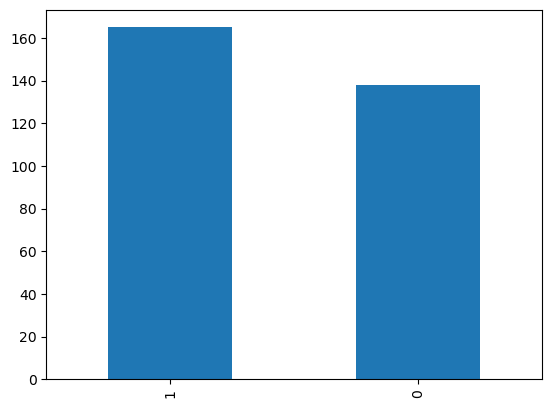

In [25]:
heart_disease["target"].value_counts().plot(kind="bar");

In [15]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequency according to sex

In [19]:
heart_disease["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

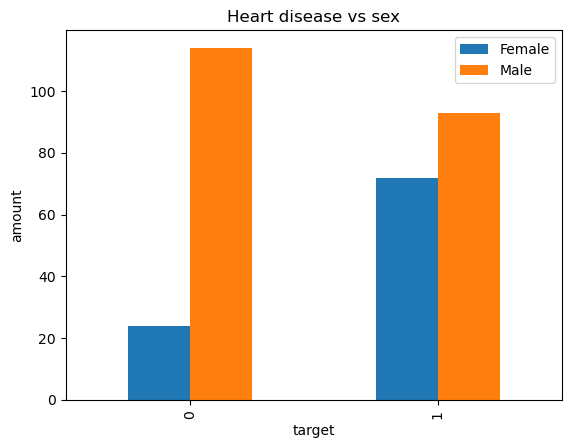

In [24]:
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar")
plt.title("Heart disease vs sex")
plt.xlabel("target")
plt.ylabel("amount")
plt.legend(["Female","Male"])

### Age vs max heart rate for heart disease

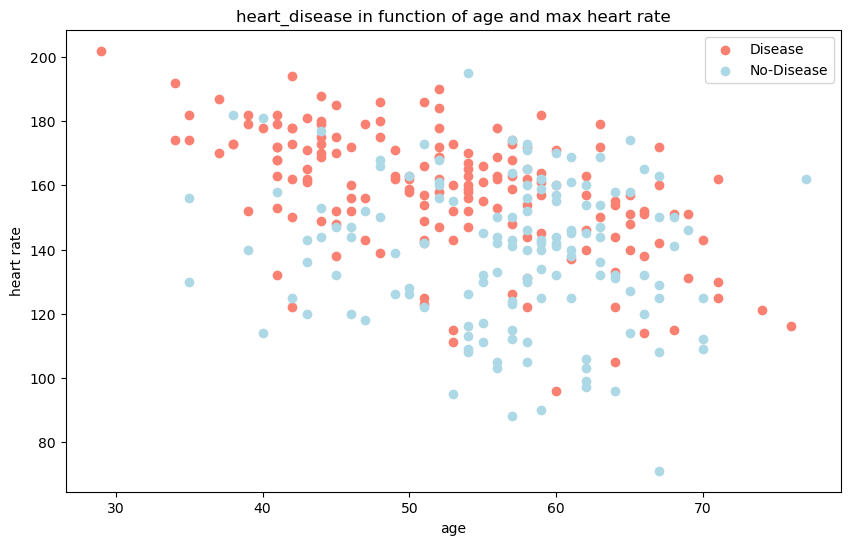

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],heart_disease.thalach[heart_disease.target==1],c="salmon")
## scatter with negative example
plt.scatter(heart_disease.age[heart_disease.target==0],heart_disease.thalach[heart_disease.target==0],c="lightblue")


plt.title("heart_disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["Disease","No-Disease"])

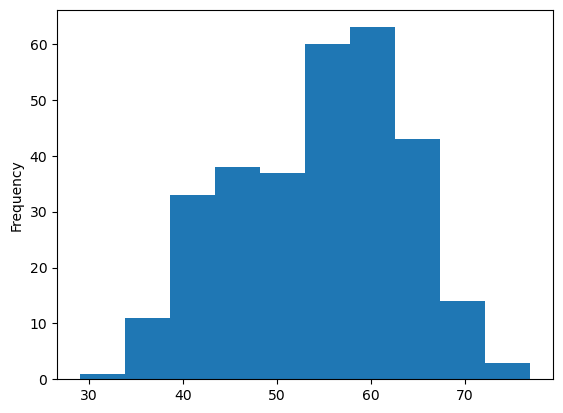

In [39]:
heart_disease.age.plot.hist();

## Heart disease frequency per chest pain type

cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

In [42]:
pd.crosstab(heart_disease.cp,heart_disease.target)



target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [43]:
# make the cross tab more visaul

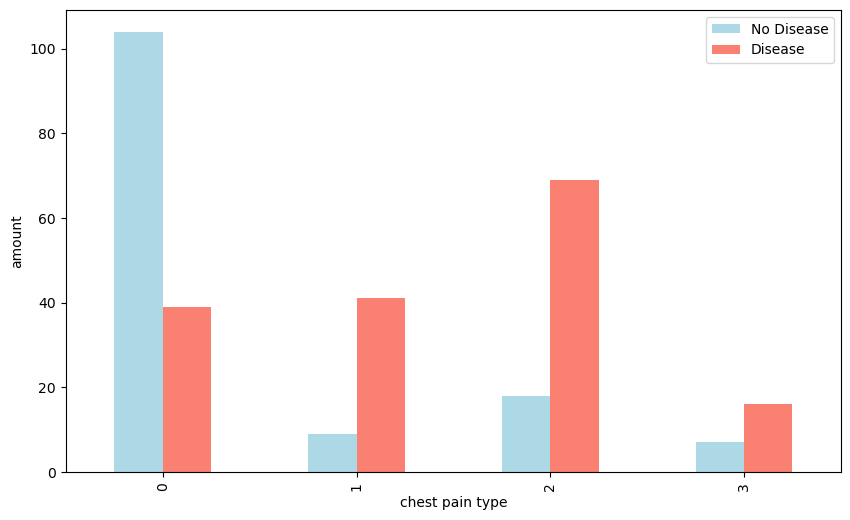

In [48]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar",figsize=(10,6),color=["lightblue","salmon"]);
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["No Disease","Disease"])

In [49]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


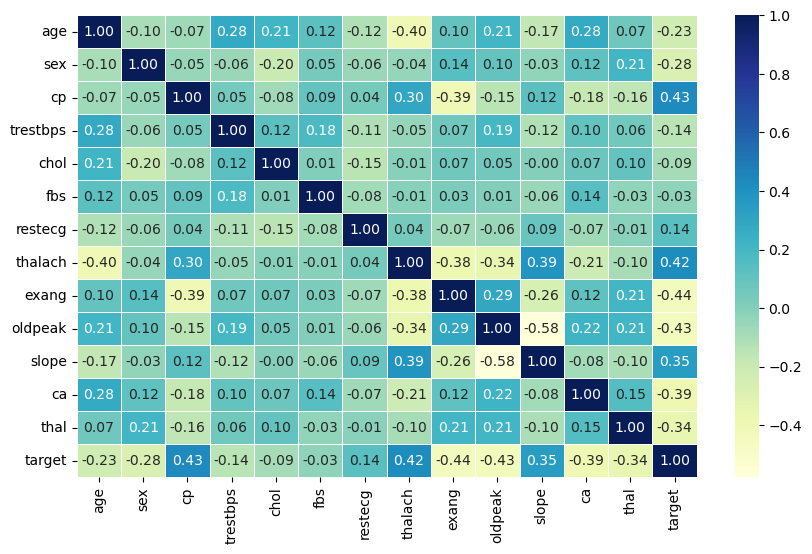

In [51]:

corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(10,6))
ax=sls.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

## 5 Modelling

In [52]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Split data into x and Y 


In [53]:
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

In [54]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [55]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [56]:
len(y_train)

242

### Choosing the model
refer here https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
    

### Trying 3 different models

1.Logistic Regression

2.KNN

3.Random Forest



In [65]:
# put models in a dictionary

models={"logistic regression":LogisticRegression(),"KNN":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    
    # make a dictionary for model scores
    
    model_scores={}
    # loop through models
    
    for name,model in models.items():
        model.fit(x_train,y_train)
        
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores
    
    


In [66]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

/Users/nandini/Desktop/sample-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparision

In [75]:
model_comp=pd.DataFrame(model_scores,index=["accuracy"])

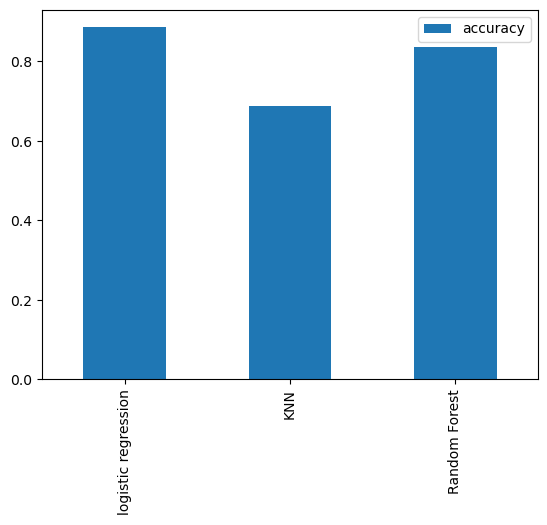

In [76]:
model_comp.T.plot.bar();

## Hyperparameter Tuning

In [84]:
## KNN

train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    
    


In [80]:
train_scores


[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [85]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max score on knn 75.41


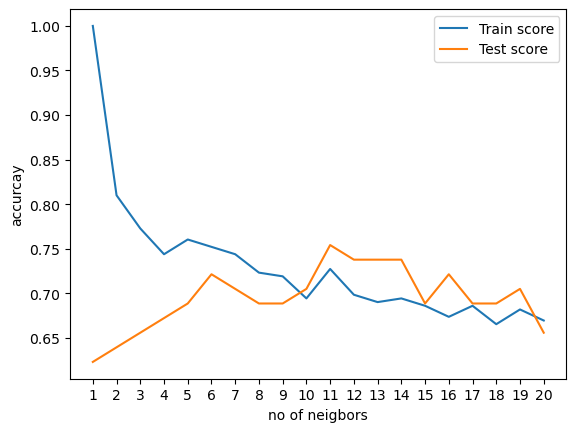

In [90]:
plt.plot(neighbors,train_scores,label="Train score");
plt.plot(neighbors,test_scores,label="Test score");
plt.xlabel("no of neigbors")
plt.ylabel("accurcay")
plt.legend()
plt.xticks(np.arange(1,21,1))
print(f"max score on knn {max(test_scores)*100:.2f}")

## Hyperparamete tuning with RandomisedSearchCV

In [91]:
# tuning on Logistic regression and RandomForest

In [105]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

rand_for_grid={"n_estimators":np.arange(10,1000,50),
              "max_depth":[None,3,5,10],
              "min_samples_split":np.arange(2,20,2),
              "min_samples_leaf":np.arange(1,20,2)}


In [94]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

#fitting the model

rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [95]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [96]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [106]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rand_for_grid,cv=5,n_iter=20,verbose=True)

In [107]:
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [108]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [109]:
rs_rf.score(x_test,y_test)

0.8688524590163934

## Hyperparameter tuning using grid search cv

In [112]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#setup grid hyperparametr

gs_log_red=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_red.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [113]:

gs_log_red.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [114]:
gs_log_red.score(x_test,y_test)

0.8852459016393442

## Using other evaluations 

In [115]:
y_pred=gs_log_red.predict(x_test)

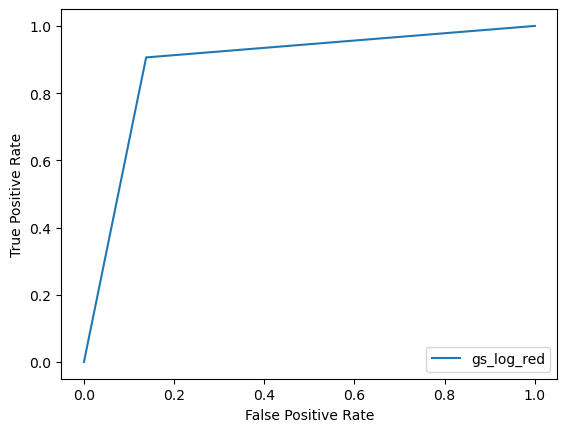

In [123]:
# Plot Roc curve and calculate AUC
from sklearn import metrics
fpr,tpr,tresholds=metrics.roc_curve(y_test,y_pred)
display=RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name="gs_log_red");
display.plot()
plt.show()

In [124]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


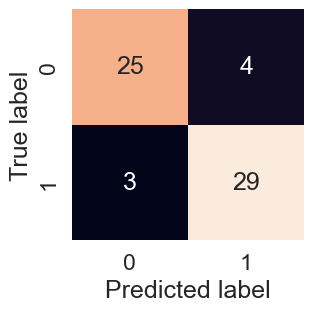

In [134]:
sls.set(font_scale=1.5)
def plot_conf_matrix(y_test,y_pred):
    fig,ax=plt.subplots(figsize=(3,3))

    ax=sls.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(y_test,y_pred)

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [136]:
### calculate evaluation matrix using cross validation



In [137]:
gs_log_red.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [146]:
model=LogisticRegression(C=0.20433597178569418,solver='liblinear')

In [147]:
accuracy=cross_val_score(model,X,Y,cv=5,scoring="accuracy")

In [160]:
np.mean(accuracy)

0.8446994535519124

In [161]:

precision=cross_val_score(model,X,Y,cv=5,scoring="precision")
np.mean(precision)

0.8207936507936507

In [162]:
recall=cross_val_score(model,X,Y,cv=5,scoring="recall")
np.mean(recall)

0.9212121212121213

In [164]:
f1=cross_val_score(model,X,Y,cv=5,scoring="f1")
np.mean(f1)

0.8673007976269721

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.86406124093473

<Axes: title={'center': 'cross validated evaluation metrics'}>

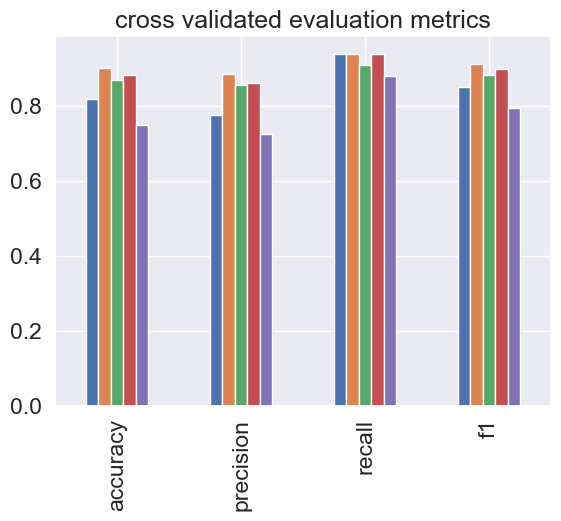

In [173]:
cv_metrics=pd.DataFrame({"accuracy":accuracy,
           "precision":precision,
           "recall":recall,
           "f1":f1}
   )

cv_metrics.T.plot.bar(title="cross validated evaluation metrics",legend=False)

### Feature importance

which features contributed most to the predictions

In [176]:
gs_log_red.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [177]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [178]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [180]:
feature_dict=dict(zip(heart_disease.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672721856887734,
 'sex': -0.860445816920919,
 'cp': 0.6606707303492849,
 'trestbps': -0.011569930902919925,
 'chol': -0.001663741604035976,
 'fbs': 0.04386130751482091,
 'restecg': 0.3127578715206996,
 'thalach': 0.02459360818122666,
 'exang': -0.6041303799858143,
 'oldpeak': -0.5686285194546157,
 'slope': 0.4505161679452401,
 'ca': -0.6360986316921434,
 'thal': -0.6766337521354281}

<Axes: title={'center': 'Feature importance'}>

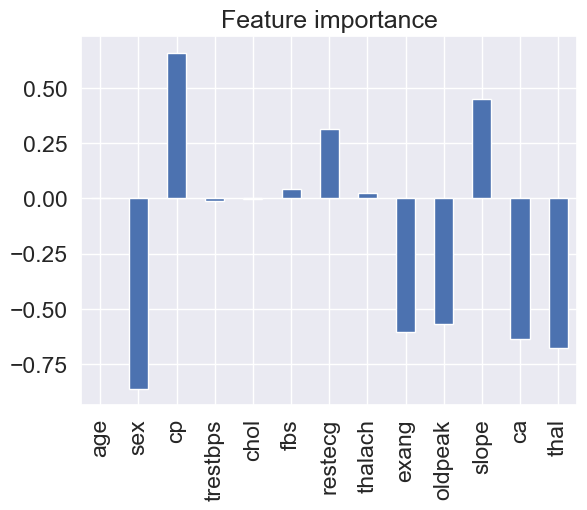

In [185]:
# visualize feature importance
featuredf=pd.DataFrame(feature_dict,index=[0])
featuredf.T.plot.bar(title="Feature importance",legend=False)